In [330]:
import BSE
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
import random
import pprint
import pandas as pd
import seaborn as sns

from BSE import market_session

# Constants

In [2]:
""" 600 seconds, each trading period lasts 40 seconds (600 / 15 = 40)
"""
START_TIME     = 0
END_TIME       = 10 * 60
ORDER_INTERVAL = 15

# Basic Experimentation

In [308]:
buyers_spec = [
    ('ZIC', 10),
    ('ZIP', 10)
]
sellers_spec = buyers_spec
traders_spec = {'sellers': sellers_spec, 'buyers': buyers_spec}

In [317]:
buyers_spec = [
    ('ZIP', 10),
    ('ZIC', 10),
    ('GVWY', 10), 
    ('PRDE', 10, {'k': 4, 's_min': -1, 's_max': 1})
]
sellers_spec = buyers_spec
num_sellers  = 20
num_buyers   = 20

traders_spec = {'sellers': sellers_spec, 'buyers': buyers_spec}

In [318]:
trial_id = 'test1'
trial_dump = open('test1data.csv', 'w')
dump_all = True
verbose = False

market_session(
    trial_id,
    START_TIME,
    END_TIME,
    traders_spec,
    fixed_order_schedules['periodic'],
    trial_dump,
    dump_all,
    verbose
)

B30: PRDE active_strat=[0]:
[0]: s=+0.855888, start=0.000000, $=0.000000, pps=0.000000
[1]: s=+0.685410, start=0.000000, $=0.000000, pps=0.000000
[2]: s=+0.204879, start=0.000000, $=0.000000, pps=0.000000
[3]: s=+0.808412, start=0.000000, $=0.000000, pps=0.000000


B31: PRDE active_strat=[0]:
[0]: s=-0.243463, start=0.000000, $=0.000000, pps=0.000000
[1]: s=+0.637141, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.906632, start=0.000000, $=0.000000, pps=0.000000
[3]: s=+0.854197, start=0.000000, $=0.000000, pps=0.000000


B32: PRDE active_strat=[0]:
[0]: s=+0.434981, start=0.000000, $=0.000000, pps=0.000000
[1]: s=+0.270314, start=0.000000, $=0.000000, pps=0.000000
[2]: s=+0.422940, start=0.000000, $=0.000000, pps=0.000000
[3]: s=-0.812321, start=0.000000, $=0.000000, pps=0.000000


B33: PRDE active_strat=[0]:
[0]: s=+0.921119, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.222381, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.794331, start=0.000000, $=0.000000, pps=0.0000

In [322]:
def generate_header(buyers_spec):
    header = ['trial', 'time_s', 'best_bid', 'best_offer']
    for i, _ in enumerate(buyers_spec):
        header += [f'trader{i}', f'trader{i}_total_profit', f'trader{i}_num_traders', f'trader{i}_avg_profit']
    return header

In [315]:
def read_data(path, traders_spec):
    if traders_spec['sellers'] == traders_spec['buyers']:
        header = generate_header(traders_spec['sellers'])
    df = pd.read_csv(path, usecols=range(len(header)),
                     lineterminator='\n', names=header)
    return df

In [320]:
def get_traders_total_profit(dataframe):
    return

In [323]:
df = read_data('test1data.csv', traders_spec)
df

,trial,time_s,best_bid,best_offer,trader0,trader0_total_profit,trader0_num_traders,trader0_avg_profit,trader1,trader1_total_profit,trader1_num_traders,trader1_avg_profit,trader2,trader2_total_profit,trader2_num_traders,trader2_avg_profit,trader3,trader3_total_profit,trader3_num_traders,trader3_avg_profit
0,test1,15,70,85,GVWY,55,20,2.75,PRDE,22.0,20.0,1.10,ZIC,0.0,20.0,0.0,ZIP,0.0,20.0,0.00
1,test1,15,70,85,GVWY,55,20,2.75,PRDE,22.0,20.0,1.10,ZIC,0.0,20.0,0.0,ZIP,36.0,20.0,1.80
2,test1,15,83,87,GVWY,55,20,2.75,PRDE,33.0,20.0,1.65,ZIC,0.0,20.0,0.0,ZIP,36.0,20.0,1.80
3,test1,15,83,104,GVWY,87,20,4.35,PRDE,58.0,20.0,2.90,ZIC,0.0,20.0,0.0,ZIP,36.0,20.0,1.80
4,test1,15,83,119,GVWY,87,20,4.35,PRDE,88.0,20.0,4.40,ZIC,0.0,20.0,0.0,ZIP,60.0,20.0,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,test1,571,102,115,GVWY,8019,20,400.95,PRDE,5119.0,20.0,255.95,ZIC,7904.0,20.0,395.2,ZIP,9066.0,20.0,453.30
731,test1,572,100,115,GVWY,8023,20,401.15,PRDE,5119.0,20.0,255.95,ZIC,7904.0,20.0,395.2,ZIP,9067.0,20.0,453.35
732,test1,572,83,114,GVWY,8035,20,401.75,PRDE,5119.0,20.0,255.95,ZIC,7904.0,20.0,395.2,ZIP,9068.0,20.0,453.40
733,test1,572,83,116,GVWY,8042,20,402.10,PRDE,5119.0,20.0,255.95,ZIC,7904.0,20.0,395.2,ZIP,9071.0,20.0,453.55


In [362]:
def total_profit_filter(traders_spec):
    col_filter = []
    if traders_spec['buyers'] == traders_spec['sellers']:
        for i, _ in enumerate(buyers_spec):
            col_filter += [f'trader{i}_total_profit']
    return col_filter

def avg_profit_filter(traders_spec):
    col_filter = []
    if traders_spec['buyers'] == traders_spec['sellers']:
        for i, _ in enumerate(buyers_spec):
            col_filter += [f'trader{i}_avg_profit']
    return col_filter

In [363]:
df[avg_profit_filter(traders_spec)]

,trader0_avg_profit,trader1_avg_profit,trader2_avg_profit,trader3_avg_profit
0,2.75,1.10,0.0,0.00
1,2.75,1.10,0.0,1.80
2,2.75,1.65,0.0,1.80
3,4.35,2.90,0.0,1.80
4,4.35,4.40,0.0,3.00
...,...,...,...,...
730,400.95,255.95,395.2,453.30
731,401.15,255.95,395.2,453.35
732,401.75,255.95,395.2,453.40
733,402.10,255.95,395.2,453.55


In [375]:
def plot_profit(dataframe):
    sns.lineplot(hue='Trader', data=dataframe)

In [376]:
plot_profit(df[avg_profit_filter(traders_spec)])

ValueError: The following variable cannot be assigned with wide-form data: `hue`

In [360]:
def plot_avg_profit(dataframe):
    if traders_spec['buyers'] == traders_spec['sellers']:
        for i, _ in enumerate(traders_spec['buyers']):
            x = dataframe.index
            y = dataframe[f'trader{i}_avg_profit']
            sns.lineplot(x='Time (s)', y='Average Profit')

In [361]:
plot_avg_profit(df)

ValueError: Could not interpret value `Time (s)` for parameter `x`

# Offset Functions

## Drunkard's Walk

In [48]:
def offset_GBM(end_time):
    return b.gen_random_walk(end_time)

## Step Offset

In [29]:
def offset_step(t):
    return t // 10

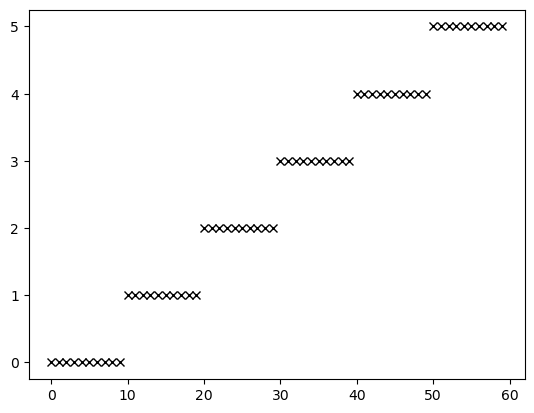

In [31]:
plot_offset_fn(offset_step, 60)

## Sine Wave

In [26]:
def offset_sine(t):
    pi2 = math.pi * 2
    c   = math.pi * 3000
    wavelength = t / c
    gradient   = 100 * t / (c / pi2)
    amplitude  = 100 * t / (c / pi2)
    offset = gradient + amplitude * math.sin(wavelength * t)
    return int(round(offset, 0))

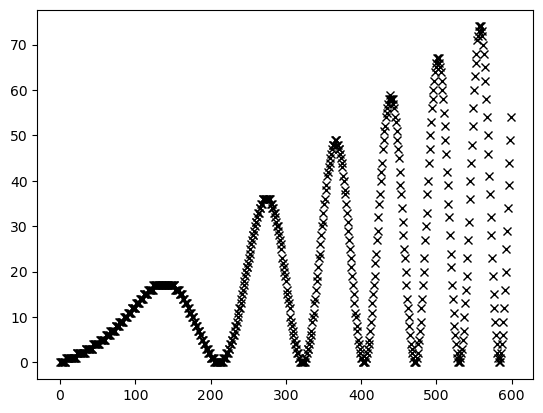

In [27]:
plot_offset_fn(offset_sine, 60 * 10)

# Supply and Demand Schedules

## Static Supply and Demand

In [5]:
sup_range = (50, 150)
dem_range = (50, 150)

### Fixed Stepmode

Orders are spaced out equally, producing supply-demand curves with fixed step size.

In [56]:
fixed_supply_schedule = [{
    'from': START_TIME, 'to': END_TIME,
    'ranges': [sup_range],
    'stepmode': 'fixed'
}]

fixed_demand_schedule = [{
    'from': START_TIME, 'to': END_TIME,
    'ranges': [dem_range],
    'stepmode': 'fixed'
}]

# All traders are given a new order periodically at the same time,
# at the beginning of every interval.
fixed_periodic_order_schedule = {
    'sup'     : fixed_supply_schedule,
    'dem'     : fixed_demand_schedule,
    'interval': ORDER_INTERVAL,
    'timemode': 'periodic'
}

# Orders are given to traders one at a time at fixed intervals.
fixed_drip_fixed_order_schedule = {
    'sup'     : fixed_supply_schedule,
    'dem'     : fixed_demand_schedule,
    'interval': ORDER_INTERVAL,
    'timemode': 'drip-fixed'
}

# Similar to 'drip-fixed', but intervals are not fixed due to 
# added random noise.
fixed_drip_jitter_order_schedule = {
    'sup'     : fixed_supply_schedule,
    'dem'     : fixed_demand_schedule,
    'interval': ORDER_INTERVAL,
    'timemode': 'drip-jitter'
}

# New order arrive at intervals modelled with a Poisson distribution.
fixed_drip_poisson_order_schedule = {
    'sup'     : fixed_supply_schedule,
    'dem'     : fixed_demand_schedule,
    'interval': ORDER_INTERVAL,
    'timemode': 'drip-poisson'
}

""" All order schedules with the different types of re-supply schedules,
    using the fixed stepmode for spacing out orders.
"""
fixed_order_schedules = {
    'periodic'     : fixed_periodic_order_schedule,
    'drip-fixed'   : fixed_drip_fixed_order_schedule,
    'drip-jitter'  : fixed_drip_jitter_order_schedule,
    'drip-poisson' : fixed_drip_poisson_order_schedule
}

### Jittered Stepmode

Fixed stepmode, with random adjustments for each order, allowing each to deviate by *at most* half a step upwards or downards, simulating random noise.

In [57]:
jittered_supply_schedule = [{
    'from': START_TIME, 'to': END_TIME,
    'ranges': [sup_range],
    'stepmode': 'jittered'
}]

jittered_demand_schedule = [{
    'from': START_TIME, 'to': END_TIME,
    'ranges': [dem_range],
    'stepmode': 'jittered'
}]

# All traders are given a new order periodically at the same time,
# at the beginning of every interval.
jittered_periodic_order_schedule = {
    'sup'     : jittered_supply_schedule,
    'dem'     : jittered_demand_schedule,
    'interval': ORDER_INTERVAL,
    'timemode': 'periodic'
}

# Orders are given to traders one at a time at fixed intervals.
jittered_drip_fixed_order_schedule = {
    'sup'     : jittered_supply_schedule,
    'dem'     : jittered_demand_schedule,
    'interval': ORDER_INTERVAL,
    'timemode': 'drip-fixed'
}

# Similar to 'drip-fixed', but intervals are not fixed due to 
# added random noise.
jittered_drip_jitter_order_schedule = {
    'sup'     : jittered_supply_schedule,
    'dem'     : jittered_demand_schedule,
    'interval': ORDER_INTERVAL,
    'timemode': 'drip-jitter'
}

# New order arrive at intervals modelled with a Poisson distribution.
jittered_drip_poisson_order_schedule = {
    'sup'     : jittered_supply_schedule,
    'dem'     : jittered_demand_schedule,
    'interval': ORDER_INTERVAL,
    'timemode': 'drip-poisson'
}

""" All order schedules with the different types of re-supply schedules,
    using the jittered stepmode for spacing out orders.
"""
jittered_order_schedules = {
    'periodic'     : jittered_periodic_order_schedule,
    'drip-fixed'   : jittered_drip_fixed_order_schedule,
    'drip-jitter'  : jittered_drip_jitter_order_schedule,
    'drip-poisson' : jittered_drip_poisson_order_schedule
}

### Random Stepmode

Assigns each trader an order which is set at random within specified range.

In [58]:
random_supply_schedule = [{
    'from': START_TIME, 'to': END_TIME,
    'ranges': [sup_range],
    'stepmode': 'random'
}]

random_demand_schedule = [{
    'from': START_TIME, 'to': END_TIME,
    'ranges': [dem_range],
    'stepmode': 'random'
}]

# All traders are given a new order periodically at the same time,
# at the beginning of every interval.
random_periodic_order_schedule = {
    'sup'     : random_supply_schedule,
    'dem'     : random_demand_schedule,
    'interval': ORDER_INTERVAL,
    'timemode': 'periodic'
}

# Orders are given to traders one at a time at fixed intervals.
random_drip_fixed_order_schedule = {
    'sup'     : random_supply_schedule,
    'dem'     : random_demand_schedule,
    'interval': ORDER_INTERVAL,
    'timemode': 'drip-fixed'
}

# Similar to 'drip-fixed', but intervals are not fixed due to 
# added random noise.
random_drip_jitter_order_schedule = {
    'sup'     : random_supply_schedule,
    'dem'     : random_demand_schedule,
    'interval': ORDER_INTERVAL,
    'timemode': 'drip-jitter'
}

# New order arrive at intervals modelled with a Poisson distribution.
random_drip_poisson_order_schedule = {
    'sup'     : random_supply_schedule,
    'dem'     : random_demand_schedule,
    'interval': ORDER_INTERVAL,
    'timemode': 'drip-poisson'
}

""" All order schedules with the different types of re-supply schedules,
    using the random stepmode for spacing out orders.
"""
random_order_schedules = {
    'periodic'     : random_periodic_order_schedule,
    'drip-fixed'   : random_drip_fixed_order_schedule,
    'drip-jitter'  : random_drip_jitter_order_schedule,
    'drip-poisson' : random_drip_poisson_order_schedule
}

**Example use:**

`<stepmode>_order_schedules['timemode']`

`stepmode`:
- fixed
- jittered
- random

`timemode`:
- periodic
- drip-fixed
- drip-jitter
- drip-poisson

In [61]:
# Order schedule that uses a fixed stepmode for spacing out orders within
# our supply and demand range, with a periodic timemode.
print("Fixed spacing and periodic redistribution: \n")
pprint.pprint(fixed_order_schedules['periodic'])
print()

# Uses a jittered stepmode for spacing out orders within our supply and
# demand range, with drip-fixed timemode.
print("Jittered spacing and drip-fixed redistribution: \n")
pprint.pprint(jittered_order_schedules['drip-fixed'])
print()

# Random stepmode for spacing our orders, with drip-jitter timemode for
# re-distribution of orders to traders.
print("Random spacing and drip-jitter redistribution: \n")
pprint.pprint(random_order_schedules['drip-jitter'])

Fixed spacing and periodic redistribution: 

{'dem': [{'from': 0, 'ranges': [(50, 150)], 'stepmode': 'fixed', 'to': 600}],
 'interval': 15,
 'sup': [{'from': 0, 'ranges': [(50, 150)], 'stepmode': 'fixed', 'to': 600}],
 'timemode': 'periodic'}

Jittered spacing and drip-fixed redistribution: 

{'dem': [{'from': 0, 'ranges': [(50, 150)], 'stepmode': 'jittered', 'to': 600}],
 'interval': 15,
 'sup': [{'from': 0, 'ranges': [(50, 150)], 'stepmode': 'jittered', 'to': 600}],
 'timemode': 'drip-fixed'}

Random spacing and drip-jitter redistribution: 

{'dem': [{'from': 0, 'ranges': [(50, 150)], 'stepmode': 'random', 'to': 600}],
 'interval': 15,
 'sup': [{'from': 0, 'ranges': [(50, 150)], 'stepmode': 'random', 'to': 600}],
 'timemode': 'drip-jitter'}


# Helper Functions

In [17]:
# Use this to plot trades of a single experiment
def plot_trades(trial_id):
    prices_fname = trial_id + '_tape.csv'
    x = np.empty(0)
    y = np.empty(0)
    with open(prices_fname, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            time = float(row[1])
            price = float(row[2])
            x = np.append(x,time)
            y = np.append(y,price)

    plt.plot(x, y, 'x', color='black') 

In [18]:
# Use this to run an experiment n times and plot all trades
def n_runs_plot_trades(n, trial_id, start_time, end_time, traders_spec, order_sched):
    x = np.empty(0)
    y = np.empty(0)

    for i in range(n):
        trialId = trial_id + '_' + str(i)
        tdump = open(trialId + '_avg_balance.csv','w')

        market_session(trialId, start_time, end_time, traders_spec, order_sched, tdump, True, False)
        
        tdump.close()

        with open(trialId + '_tape.csv', newline='') as csvfile:
            reader = csv.reader(csvfile)
            for row in reader:
                time = float(row[1])
                price = float(row[2])
                x = np.append(x,time)
                y = np.append(y,price)

    plt.plot(x, y, 'x', color='black');

In [19]:
# !!! Don't use on it's own   
def getorderprice(i, sched, n, mode):
    pmin = min(sched[0][0], sched[0][1])
    pmax = max(sched[0][0], sched[0][1])
    prange = pmax - pmin
    stepsize = prange / (n - 1)
    halfstep = round(stepsize / 2.0)

    if mode == 'fixed':
        orderprice = pmin + int(i * stepsize)
    elif mode == 'jittered':
        orderprice = pmin + int(i * stepsize) + random.randint(-halfstep, halfstep)
    elif mode == 'random':
        if len(sched) > 1:
            # more than one schedule: choose one equiprobably
            s = random.randint(0, len(sched) - 1)
            pmin = min(sched[s][0], sched[s][1])
            pmax = max(sched[s][0], sched[s][1])
        orderprice = random.randint(pmin, pmax)
    return orderprice

In [20]:
# !!! Don't use on it's own
def make_supply_demand_plot(bids, asks):
    # total volume up to current order
    volS = 0
    volB = 0

    fig, ax = plt.subplots()
    plt.ylabel('Price')
    plt.xlabel('Quantity')
    
    pr = 0
    for b in bids:
        if pr != 0:
            # vertical line
            ax.plot([volB,volB], [pr,b], 'r-')
        # horizontal lines
        line, = ax.plot([volB,volB+1], [b,b], 'r-')
        volB += 1
        pr = b
    if bids:
        line.set_label('Demand')
        
    pr = 0
    for s in asks:
        if pr != 0:
            # vertical line
            ax.plot([volS,volS], [pr,s], 'b-')
        # horizontal lines
        line, = ax.plot([volS,volS+1], [s,s], 'b-')
        volS += 1
        pr = s
    if asks:
        line.set_label('Supply')
        
    if bids or asks:
        plt.legend()
    plt.show()

In [21]:
# Use this to plot supply and demand curves from supply and demand ranges and stepmode
def plot_sup_dem(seller_num, sup_ranges, buyer_num, dem_ranges, stepmode):
    asks = []
    for s in range(seller_num):
        asks.append(getorderprice(s, sup_ranges, seller_num, stepmode))
    asks.sort()
    bids = []
    for b in range(buyer_num):
        bids.append(getorderprice(b, dem_ranges, buyer_num, stepmode))
    bids.sort()
    bids.reverse()
    
    make_supply_demand_plot(bids, asks) 

In [22]:
# Plot sorted trades, useful is some situations
def in_order_plot(trial_id):
    prices_fname = trial_id + '_tape.csv'
    y = np.empty(0)
    with open(prices_fname, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            price = float(row[2])
            y = np.append(y,price)
    y = np.sort(y)
    x = list(range(len(y)))

    plt.plot(x, y, 'x', color='black') 

In [23]:
# Plot offset function
def plot_offset_fn(offset_fn, total_time_seconds):   
    x = list(range(total_time_seconds))
    offsets = []
    for i in range(total_time_seconds):
        offsets.append(offset_fn(i))
    plt.plot(x, offsets, 'x', color='black')  

# Jupyter Themes

In [28]:
!jt -r

Reset css and font defaults in:
/Users/antonwallstedt/.jupyter/custom &
/Users/antonwallstedt/Library/Jupyter/nbextensions


In [13]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [14]:
!jt -t gruvboxd